### Dentro de los asteroides también se encontró hierro, parece que los principales indicadores de la cantidad de hierro son las piedras violetas y el tamaño de los mismos.

### Con los datos recolectados R4 tratar de predecir la cantidad de hierro que tendrá un asteroide.

## IMPORTS

In [1]:
import io 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import pandas as pd
import nltk
from matplotlib import pyplot as plt
import seaborn as sns
import pickle
import numpy as np
import re
import string
import collections
from scipy.special import expit, logit
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import keras
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


## LECTURA DE DATOS

In [2]:
data=pd.read_csv("/home/exequielmoneva/Downloads/R4.csv")

In [3]:
data

,violet_stone_count,asteroid_size_km3,iron_kg
0,124,0.257110,77.821006
1,74,0.595621,56.573952
2,71,0.452432,49.120792
3,63,0.342471,45.082572
4,9,0.122430,11.456667
...,...,...,...
95,114,0.765030,98.016778
96,91,0.498953,66.877279
97,145,1.017299,132.641212
98,143,0.850081,113.581922


## ANALISIS DE DATOS

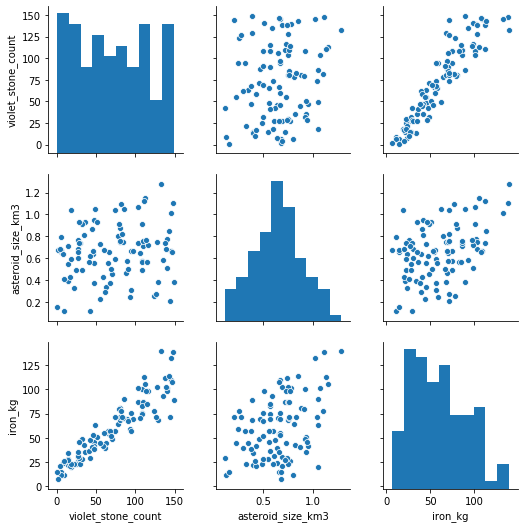

In [5]:
sns.pairplot(data)

#### Por el enunciado, puede entenderse que se produce el efecto de interaccion estadistico (Interaction Effect) entre la cantidad de piedras violetas y el tamaño de los asteroides. Se realiza la prueba para verificar.

In [6]:
data['new']=data.violet_stone_count * data.asteroid_size_km3

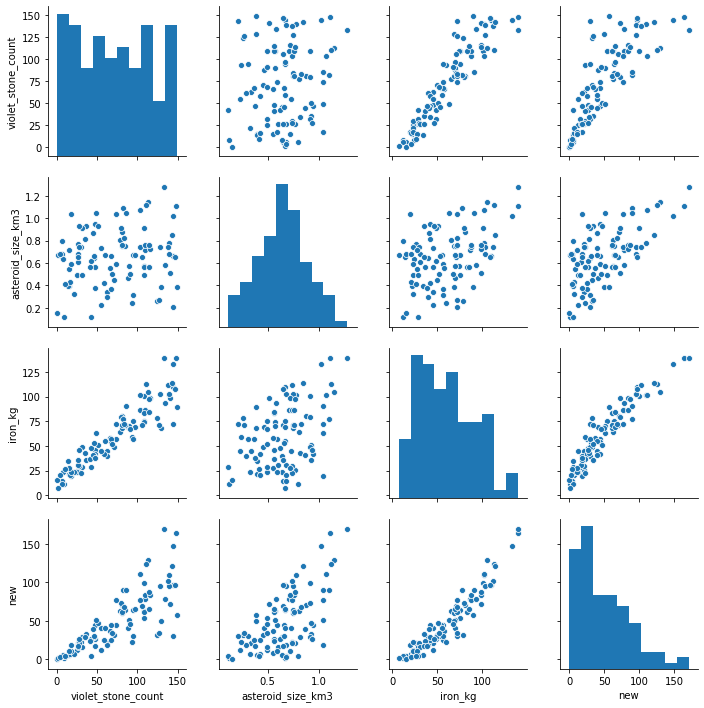

In [7]:
sns.pairplot(data)

# SE SEPARAN LOS DATOS EN TRAIN Y TEST

In [38]:
x=data[['violet_stone_count','asteroid_size_km3','new']]
y=data['iron_kg']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size= 0.2 ,random_state=48)

#### Se utiliza un StandardScaler para normalizar los valores de las variables independientes.lo que hace es comprimir o extender los valores de la variable para que estén en un rango definido. Con StandardScaler, a cada dato se le resta la media de la variable y se le divide por la desviación típica.

In [40]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(X_train)

# SE UTILIZA EL MODEL DE REGRESION LINEAL

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
reg = LinearRegression().fit(X_train, y_train)

#### Se realiza la prediccion

In [43]:
preds = reg.predict(X_test)

#### Valores de accuracy de los resultados obtenidos

In [44]:
reg.score(X_test, y_test) # Puntuacion de accuracy

0.9606845377812283

In [45]:
from sklearn.metrics import explained_variance_score

In [46]:
explained_variance_score(preds, y_test)

0.9601645783671701